# Gradient Descent

*Dr. Aydede*
**NLP & LLM Workshop - August 28, 2024**

This is a replica of `GradientD.qmd` R codes in Python

# 1. Batch Gradeint Descent

Beta coefficients: [1.0407748644803974, 1.9882765972035872]


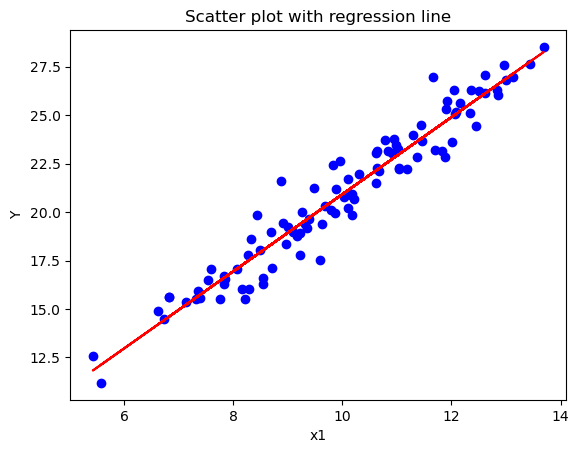

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Setting the seed for reproducibility
np.random.seed(1001)
N = 100

# Generating data
x1 = np.random.normal(10, 2, N)
Y = np.random.normal(2*x1 + 1, 1, N)

# Reshaping x1 for sklearn's LinearRegression
x1_reshaped = x1.reshape(-1, 1)

# Fitting the linear regression model
model = LinearRegression()
model.fit(x1_reshaped, Y)

# Getting the coefficients
beta = [model.intercept_, model.coef_[0]]
print("Beta coefficients:", beta)

# Plotting the data and the regression line
plt.scatter(x1, Y, color='blue', marker='o')
plt.plot(x1, model.predict(x1_reshaped), color='red')
plt.xlabel('x1')
plt.ylabel('Y')
plt.title('Scatter plot with regression line')
plt.show()


In [2]:
import numpy as np

# Setting the seed for reproducibility
np.random.seed(234)

# Starting points
b = np.random.uniform(0, 1)
c = np.random.uniform(0, 1)
n = len(x1)

# Function
yhat = c + b * x1

# Mean Squared Error
MSE = np.sum((Y - yhat) ** 2) / n
converged = False
iterations = 0

# While loop for Gradient Descent
while not converged:
    b_new = b - (0.01 * (1 / n)) * np.sum((Y - yhat) * x1 * (-1))
    c_new = c - (0.01 * (1 / n)) * np.sum((Y - yhat) * (-1))
    
    b = b_new
    c = c_new
    
    yhat = b * x1 + c
    MSE_new = np.sum((Y - yhat) ** 2) / n
    MSE = np.append(MSE, MSE_new)
    
    # Check for convergence
    d = np.abs(np.diff(MSE))[-1]
    if round(d, 12) == 0:
        converged = True
    iterations += 1
    if iterations > 100000:
        converged = True

print(f"Iterations: {iterations}, c: {c}, b: {b}")


Iterations: 24669, c: 1.0406269247981081, b: 1.988290912728953


In [3]:
import numpy as np

# Setting the seed for reproducibility
np.random.seed(1001)

# Generating data
N = 1000
x1 = np.random.normal(10, 2, N)
Y = np.random.normal(2 * x1 + 1, 1, N)

# Fitting a linear regression model using sklearn for comparison
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x1.reshape(-1, 1), Y)
beta = [model.intercept_, model.coef_[0]]
print(f"Sklearn coefficients: Intercept: {beta[0]}, Slope: {beta[1]}")

# Custom Gradient Descent function
def grdescent(x, y, lr, maxiter):
    # Starting points
    np.random.seed(234)
    b = np.random.uniform(0, 1)
    c = np.random.uniform(0, 1)
    n = len(x)
    
    # Initial predictions
    yhat = c + b * x
    
    # Initial Mean Squared Error (MSE)
    MSE = np.sum((y - yhat) ** 2) / n
    converged = False
    iterations = 0
    
    # Gradient Descent loop
    while not converged:
        # Gradient calculation and update
        b_new = b - (lr * (1 / n)) * np.sum((y - yhat) * x * (-1))
        c_new = c - (lr * (1 / n)) * np.sum((y - yhat) * (-1))
        
        b = b_new
        c = c_new
        
        # Updated predictions
        yhat = b * x + c
        
        # Calculate new MSE
        MSE_new = np.sum((y - yhat) ** 2) / n
        MSE = np.append(MSE, MSE_new)
        
        # Check for convergence
        d = np.abs(np.diff(MSE))[-1]
        if round(d, 12) == 0:
            converged = True
            return f"Iterations: {iterations}, Intercept: {c}, Slope: {b}"
        
        iterations += 1
        if iterations > maxiter:
            converged = True
            return f"Max. iter. reached. Intercept: {c}, Slope: {b}"

# Running the gradient descent
result = grdescent(x1, Y, 0.01, 100000)
print(result)

# Compare with the sklearn linear regression coefficients
print(f"True coefficients (sklearn): Intercept: {beta[0]}, Slope: {beta[1]}")


Sklearn coefficients: Intercept: 1.0529467592382815, Slope: 1.999936193723117
Iterations: 22914, Intercept: 1.0528109505668422, Slope: 1.9999493556594048
True coefficients (sklearn): Intercept: 1.0529467592382815, Slope: 1.999936193723117


# 2 Stochastic Gradient Descent

In [4]:
import numpy as np

# Setting the seed for reproducibility
np.random.seed(1001)

# Generating data
N = 1000
x1 = np.random.normal(10, 2, N)
Y = np.random.normal(2 * x1 + 1, 1, N)

# Sklearn model for comparison
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x1.reshape(-1, 1), Y)
beta = [model.intercept_, model.coef_[0]]
print(f"Sklearn coefficients: Intercept: {beta[0]}, Slope: {beta[1]}")

# Starting points
np.random.seed(234)
b = np.random.uniform(0, 1)
c = np.random.uniform(0, 1)

# Stochastic Gradient Descent parameters
learning_rate = 0.01
max_iterations = 100000
converged = False
iterations = 0
MSE = []

# SGD loop
while not converged and iterations < max_iterations:
    # Randomly select an index for stochastic update
    i = np.random.randint(0, N)
    x_i = x1[i]
    y_i = Y[i]
    
    # Calculate prediction for the selected data point
    yhat_i = c + b * x_i
    
    # Update rules for SGD
    b_new = b - learning_rate * (yhat_i - y_i) * x_i
    c_new = c - learning_rate * (yhat_i - y_i)
    
    # Check for convergence based on the change in coefficients
    if abs(b_new - b) < 1e-8:
        converged = True
    
    b = b_new
    c = c_new
    iterations += 1
    
    # Calculate overall MSE using all data points (optional)
    yhat = b * x1 + c
    MSE_new = np.sum((Y - yhat) ** 2) / N
    MSE.append(MSE_new)
    
    if len(MSE) > 1 and np.abs(MSE[-1] - MSE[-2]) < 1e-8:
        converged = True

# Output the results
print(f"Iterations: {iterations}, Intercept: {c}, Slope: {b}")
print(f"Sklearn coefficients: Intercept: {beta[0]}, Slope: {beta[1]}")
print(f"Final MSE: {MSE[-1]}")


Sklearn coefficients: Intercept: 1.0529467592382815, Slope: 1.999936193723117
Iterations: 100000, Intercept: 1.0365803975794254, Slope: 2.1516187804978864
Sklearn coefficients: Intercept: 1.0529467592382815, Slope: 1.999936193723117
Final MSE: 3.2328641032260466


# 3 Mini-batch Grarient Descent

In [5]:
import numpy as np

# Setting the seed for reproducibility
np.random.seed(1001)

# Generating data
N = 10000000
x1 = np.random.normal(10, 2, N)
Y = np.random.normal(2 * x1 + 1, 1, N)

# Sklearn model for comparison
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x1.reshape(-1, 1), Y)
beta = [model.intercept_, model.coef_[0]]
print(f"Sklearn coefficients: Intercept: {beta[0]}, Slope: {beta[1]}")

# Starting points
np.random.seed(234)
b = np.random.uniform(0, 1)
c = np.random.uniform(0, 1)
n = len(x1)

# Parameters
learning_rate = 0.01
batch = 10000
epochs = 10  # Reduced for practicality
epsilon = 1e-6  # Small threshold for convergence check

# Initial predictions
yhat = c + b * x1
MSE = np.sum((Y - yhat) ** 2) / n
converged = False
iterations = 0
MSE_change = np.zeros(epochs)  # Pre-allocate for efficiency

# While loop for mini-batch gradient descent
while not converged and iterations < epochs:
    # Shuffle data points
    indices = np.random.permutation(n)
    
    for i in range(0, n, batch):
        idx = indices[i:min(i + batch, n)]
        x_batch = x1[idx]
        y_batch = Y[idx]
        
        yhat_batch = c + b * x_batch
        
        # Gradient calculation
        b_gradient = -(1 / len(idx)) * np.sum((y_batch - yhat_batch) * x_batch)
        c_gradient = -(1 / len(idx)) * np.sum(y_batch - yhat_batch)
        
        # Update parameters
        b -= learning_rate * b_gradient
        c -= learning_rate * c_gradient
    
    # Recalculate yhat and MSE
    yhat = c + b * x1
    MSE_new = np.sum((Y - yhat) ** 2) / n
    MSE_change[iterations] = abs(MSE_new - MSE)
    MSE = MSE_new
    
    # Check for convergence
    if MSE_change[iterations] < epsilon:
        converged = True
    
    iterations += 1

# Trim the unused portion of the pre-allocated array
MSE_change = MSE_change[:iterations]

# Output results
print(f"Iterations: {iterations}, Intercept: {c}, Slope: {b}")
print(f"Final MSE Change: {MSE_change[-1]}")
print(f"Sklearn coefficients: Intercept: {beta[0]}, Slope: {beta[1]}")


Sklearn coefficients: Intercept: 1.0005512995913577, Slope: 1.9999119399285952
Iterations: 10, Intercept: 0.9883163590930931, Slope: 2.000510524713098
Final MSE Change: 0.000106152407240101
Sklearn coefficients: Intercept: 1.0005512995913577, Slope: 1.9999119399285952


# Adjustable Learning Rate

In [6]:
import numpy as np

# Setting the seed for reproducibility
np.random.seed(1001)

# Generating data
N = 1000000
x1 = np.random.normal(10, 2, N)
Y = np.random.normal(2 * x1 + 1, 1, N)

# Sklearn model for comparison
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x1.reshape(-1, 1), Y)
beta = [model.intercept_, model.coef_[0]]
print(f"Sklearn coefficients: Intercept: {beta[0]}, Slope: {beta[1]}")

# Starting points
np.random.seed(234)
b = np.random.uniform(0, 1)
c = np.random.uniform(0, 1)
n = len(x1)

# Parameters
initial_learning_rate = 0.01
decay_rate = 0.99999
batch_size = 50
max_iterations = 100
tolerance = 1e-8

# Initial predictions
yhat = c + b * x1
MSE = np.sum((Y - yhat) ** 2) / n
converged = False
iterations = 0
num_batches = int(np.ceil(n / batch_size))

# Mini-batch gradient descent loop
while not converged and iterations < max_iterations:
    # Shuffle data points
    indices = np.random.permutation(n)
    
    for i in range(0, n, batch_size):
        idx = indices[i:min(i + batch_size, n)]
        x_batch = x1[idx]
        y_batch = Y[idx]
        
        yhat_batch = c + b * x_batch
        
        learning_rate = initial_learning_rate * decay_rate**iterations
        
        # Update coefficients
        b_new = b - learning_rate * ((1 / len(idx)) * np.sum((y_batch - yhat_batch) * x_batch * (-1)))
        c_new = c - learning_rate * ((1 / len(idx)) * np.sum((y_batch - yhat_batch) * (-1)))
        
        b = b_new
        c = c_new
    
    # Recalculate predictions and MSE
    yhat = b * x1 + c
    MSE_new = np.sum((Y - yhat) ** 2) / n
    d = abs(MSE_new - MSE)
    
    # Check for convergence
    if d < tolerance:
        converged = True
    
    MSE = MSE_new
    iterations += 1

# Output the results
print(f"Iterations: {iterations}, Intercept: {c}, Slope: {b}")
print(f"Sklearn coefficients: Intercept: {beta[0]}, Slope: {beta[1]}")


Sklearn coefficients: Intercept: 0.9953504325236011, Slope: 2.0005372286701255
Iterations: 100, Intercept: 0.9916208023418678, Slope: 1.9949320364574064
Sklearn coefficients: Intercept: 0.9953504325236011, Slope: 2.0005372286701255
